 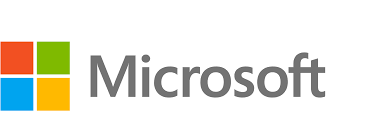
# <center> MOVIE INDUSTRY ANALYSIS FOR MICROSOFT LTD
 
    
    
    

## BUSINESS UNDESTANDING

### PROBLEM DOMAIN

Keeping in line with Microsoft's Motto of "Be What's Next!",Microsoft is looking to further diversfy its portfolio by venturing into the the Movie industry by creating a new business segment centered around the movie industry to be know as Microsoft Dream Factory (MDF). They would like to know the success factors that can be gleaned by carrying out a data analysis on various factors of the movie industry and turn those findings into actionable insight that can be used by the new head of Microsoft Dream Factory as they speared head this segment

### PROJECT OBJECTIVES
* Perform an exploratory data analysis(EDA) to determine key indicators to success in the movie industry
* Provide understanding on the problem domain through the data gleaned
* Give recommendations on directions that Microsoft Dream Factory(MDF) should take for business success

###  SUCCESS FACTORS 

The key to this explorative analysis will be to understand the success factors in the movie industry. According to S.Sowndarya, 2021 from the Journal of emerging technologies and innovative research states that the factors such as producer, production house, director, cast, runtime of the movie, genre, script, and time of release play a vital role in determining the success of a film. It can be noted that success of a film relates to the profit margins that the film house makes as well as the popularity of that film amongst the movie goes
This shall form the basis of out research as we seek to answer the follwoing questions:

1. What genre has the highest rating in the past 5 years?
2. Which directors and writers should Microsoft Dream Factory(MDF) partner with?
3. Do higher populariry ratings actually mean more profits?
4. Who should Microsoft Dream Factory(MDF) partner with?



### DATA UNDERSTANDING
The data to be used within this exploratory analysis comes from the following sources
* Box Office Mojo
* IMDB.
* Rotten Tomatoes
* TheMovieDB
* The Numbers

The approach taken shall involve the following steps:

1. Data Mining
2. Data Cleaning
3. Data Analysis 
4. Data Visualization and Insights
5. Recommendations 


### 1. DATA MINING

We shall import the necessary libraries for the whole data analysis approach we shall be taking as well as reading into the various documents that we shall be using. The documents vary in format so we shall be using different methods to open them and display the first 5 results of each to get a better understanding of what is in each documents and give a summary of what we are observing

#### 1.1 IMPORTATION OF LIBRARIES

In [1]:
# libraries required for the data anaylsis
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### 1.2 DATA MINING

In [2]:
# imported from boxofficemojo as CSV file

#opened file assigned to movie_revenue_df
revenue_df=pd.read_csv("zippedData/bom.movie_gross.csv.gz")
revenue_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


##### Cursory Observations:
1. Includes main columns on title,studio, domestic gross, foreign gross
2. Title column can be used as a primary key 
3. Domestic gross and Foreign Gross columns are assumed to be cash values
4. Domestic gross relates to US gross revenue and Foreign gross relates to revenue from all other countries not named US
5. Year column is ambigious

In [3]:
#imported from TheMovieDB as CSV file

#opened file assigned to movie_popularity_df
popularity_df=pd.read_csv("zippedData/tmdb.movies.csv.gz")
popularity_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


##### Cursory Observations:
1. Includes main columns on original language, title, vote average
2. Title column can be used as a primary key 
3. Vote_Average can be used to give a rating value based off the vote count
4. Unnamed:0,id  columns are ambigious

In [4]:
#imported from TheNumbers as CSV file

#opened file assigned to budget_and_revenue_df
budget_and_revenue_df=pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
budget_and_revenue_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


##### Cursory Observations:
1. Includes main columns on movie, production budget, domestic gross, worldwide gross
2. Movie column can be used as a primary key 
3. Worlwide Gross includes domestic gross and foreign gross
4. Gross profit can be obtained per movie title

In [5]:
#imported from rotten_tomato as TSV file

#opened file assigned to reviews_df
reviews_df=pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter='\t', encoding='unicode_escape')
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


##### Cursory Observations:
1. Includes main columns on rating, review
2. Nan values are prominent in the rating column and need further analysis 


In [6]:
# imported from rotten_tomato as TSV file

#opened file assigned to production_df
production_df=pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t')
production_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


##### Cursory Observations:
1. Includes main columns on genre, director, writer,studio
2. Genre column can be used as a primary key 
3. Theater date can be assumed to be the release date
4. Director column vs genre would be an interesting facet to explore

In [7]:
# creating a connection to the IMDB database to be used for further analysis
conn=sqlite3.connect("zippedData/im.db")                
q = pd.read_sql("""SELECT name 
                            FROM sqlite_master 
                            WHERE type = "table" ;
                            """,conn)
q


,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


##### Cursory Observations according to the ERD provided:
1. Contains 8 tables within the im database
2. All Tables share the primary key 'movie_id' except the persons table
3. person_id primary key is shared amongst the following tables persons, writers, directors, known_for, principals
4. Further analysis to follow

### 2. DATA CLEANING

We shall look into cleaning the data to get dataframes from which we will be able to draw logical conclusions from. This shall be undertaken on the data we have been able to mine from the CSV files, TSV files and the IMDB data base.
We will intiially explore the data and using the method outlined below to clean the data.
####  DATA CLEANING METHOD
1. Overview of the dataframe information
2. Check for duplicates and drop if present
3. Check for null values
4. Remove,replace or keep Null values
5. check for extraneous values
6. Perform further cleaning as needed


In [8]:
#FUNCTIONS TO BE USED DURING DATA CLEANING

#Function to get the number of duplictes
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Function to drop duplicate data in a dataframe
def drop_data(df):
    df.drop_duplicates(subset=None, keep="first", inplace= True)
    return df

#Function to get the number of Null Values
def get_isna(df):
    isna_values =df.isna().sum()
    return print(f"Sum of Isna values:\n{isna_values}")

# Function to get extraneous values i.e. values that look like placeholders or are exaggerated values
def extraneous_values(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True).head(), '\n')

# Function to calculate percentage of missing data in a column
def missing_data(df, column):
    length_of_df=len(df)                                                    #getting the length of the dataframe

    missing_data= column.isna().sum()                                       #total number of missing data in column foreign_gross

    percentage_of_missing_data = round((missing_data/length_of_df*100),2)   #percentage of missing data in the foreign_gross column
    return print(f"Percentage of Missing Data: {percentage_of_missing_data}""%")


### 2.1 Data Cleaning  revenue_df dataframe 

In [9]:
#Overview of the dataframe
revenue_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
# collecting information on the movie_revenue_df dataframe
revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
#Calling function to Check for duplicate data
get_duplicates(revenue_df)

,title,studio,domestic_gross,foreign_gross,year


Observations:
* No duplicates present in this dataframe. All entries are unique entries.

In [12]:
#Calling function to check for Null values
get_isna(revenue_df)

Sum of Isna values:
title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64


Observations:
* studio and domestic_gross have few missing values, will drop those rows
* foreign_gross has significant missing values, confirm percentage of missing data

In [13]:
#dropping the Null rows in Studio and domestic_gross columns
revenue_df=revenue_df.dropna(subset=["studio","domestic_gross"])

In [14]:
# Function to check for missing data as a percentage
missing_data(revenue_df, revenue_df["foreign_gross"])

Percentage of Missing Data: 40.2%


Observations:
* Foreign_gross column missing approximately 40% of data.
* If we replace this column with a value, it shall skew the data.
* Dropping the foreign gross data will give legitimacy to the remaning data without reducing the rows that the null values appear

In [15]:
#dropping the foreign_gross column
revenue_df=revenue_df.drop("foreign_gross", axis =1)

In [16]:
#Calling function to check for extraneous values
extraneous_values(revenue_df)

title 
 Bluebeard          0.000596
Kick-Ass 2         0.000298
Francofonia        0.000298
Life's a Breeze    0.000298
Gloria (2014)      0.000298
Name: title, dtype: float64 

studio 
 IFC      0.049464
Uni.     0.043802
WB       0.041716
Fox      0.040524
Magn.    0.040524
Name: studio, dtype: float64 

domestic_gross 
 1100000.0    0.009535
1000000.0    0.008939
1300000.0    0.008939
1200000.0    0.007449
1400000.0    0.006853
Name: domestic_gross, dtype: float64 

year 
 2015    0.133790
2016    0.129023
2011    0.117998
2012    0.117104
2014    0.116210
Name: year, dtype: float64 



In [17]:
#Calling funciton to confirm no Null values in dataset
get_isna(revenue_df)

Sum of Isna values:
title             0
studio            0
domestic_gross    0
year              0
dtype: int64


In [18]:
revenue_df

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


Observations:
* We have observed that there are 3356 entries in the dataset down from 3387 entries
* There are no null values or extraneous values in the new dataset

### 2.2 Data Cleaning popularity_df dataframe

In [19]:
#Overview of the dataframe
popularity_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [20]:
# collecting information on the movie_revenue_df dataframe
popularity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [21]:
#Calling function to check for dupicate data
get_duplicates(popularity_df)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count


Observations: 
    * No duplicates found in the dataset

In [22]:
#Calling function to check for Null values
get_isna(popularity_df)

Sum of Isna values:
Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64


In [23]:
#Calling function to check for extraneous data
extraneous_values(popularity_df)

Unnamed: 0 
 2047     0.000038
5448     0.000038
3371     0.000038
13612    0.000038
15661    0.000038
Name: Unnamed: 0, dtype: float64 

genre_ids 
 [99]    0.139533
[]      0.093487
[18]    0.085530
[35]    0.062601
[27]    0.043180
Name: genre_ids, dtype: float64 

id 
 292086    0.000113
463839    0.000113
11976     0.000113
391872    0.000113
416572    0.000113
Name: id, dtype: float64 

original_language 
 en    0.878342
fr    0.019120
es    0.017159
ru    0.011238
ja    0.009994
Name: original_language, dtype: float64 

original_title 
 Eden             0.000264
Home             0.000226
Truth or Dare    0.000189
Aftermath        0.000189
Legend           0.000189
Name: original_title, dtype: float64 

popularity 
 0.600    0.265377
1.400    0.024475
0.840    0.022137
0.624    0.003922
0.625    0.003469
Name: popularity, dtype: float64 

release_date 
 2010-01-01    0.010144
2011-01-01    0.007542
2014-01-01    0.005845
2012-01-01    0.005845
2013-01-01    0.005468
Name: release

Observations:
* There are no null values or extraneous values in the dataset

In [24]:
#converstion of datatypes to appropriate data typing
popularity_df["release_date"]=pd.to_datetime(popularity_df["release_date"])

In [25]:
#dropping columns that hold ambiguous, repetitive or unneccessary data
popularity_df.drop(['Unnamed: 0', "id","genre_ids", "original_title"], axis=1, inplace=True)

In [26]:
popularity_df.head()

,original_language,popularity,release_date,title,vote_average,vote_count
0,en,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,en,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,en,28.515,2010-05-07,Iron Man 2,6.8,12368
3,en,28.005,1995-11-22,Toy Story,7.9,10174
4,en,27.920,2010-07-16,Inception,8.3,22186


Observations:
* The dataframe does not hold any none values or duplicate values
* The dataframe now holds 26,517 entries that can be used for further analysis
* All columns have their appropriate dtype

## 2.3 Data Cleaning budget_and_revenue_df dataframe

In [27]:
#Overview of the dataframe
budget_and_revenue_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [28]:
# Collection information on the budget_and_revenue_df dataframe
budget_and_revenue_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [29]:
#Calling function to check for duplicate data
get_duplicates(budget_and_revenue_df)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross


Observation:
* No duplicates found in the dataset

In [30]:
# Calling funciton to check for NUll values
get_isna(budget_and_revenue_df)

Sum of Isna values:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


In [31]:
# Calling function to check for extraneous values
extraneous_values(budget_and_revenue_df)

id 
 4     0.010031
53    0.010031
61    0.010031
65    0.010031
69    0.010031
Name: id, dtype: float64 

release_date 
 Dec 31, 2014    0.004151
Dec 31, 2015    0.003978
Dec 31, 2010    0.002594
Dec 31, 2008    0.002421
Dec 31, 2012    0.002248
Name: release_date, dtype: float64 

movie 
 Halloween    0.000519
Home         0.000519
King Kong    0.000519
Notorious    0.000346
Hellboy      0.000346
Name: movie, dtype: float64 

production_budget 
 $20,000,000    0.039952
$10,000,000    0.036666
$30,000,000    0.030612
$15,000,000    0.029920
$25,000,000    0.029575
Name: production_budget, dtype: float64 

domestic_gross 
 $0             0.094777
$8,000,000     0.001557
$2,000,000     0.001211
$7,000,000     0.001211
$10,000,000    0.001038
Name: domestic_gross, dtype: float64 

worldwide_gross 
 $0            0.063473
$8,000,000    0.001557
$7,000,000    0.001038
$2,000,000    0.001038
$5,000,000    0.000692
Name: worldwide_gross, dtype: float64 



Observations:
* No null values or extraneous values found in the data

In [32]:
# Converting dtypes of production budget, domestic_gross and worldwide_gross and release_date to appropriate dtyping

# production budget dtype conversion to int
budget_and_revenue_df['production_budget'] = budget_and_revenue_df['production_budget'].replace('[\$\,\.]', '', regex=True).astype("int64")

# domestic gross dtype conversion to int
budget_and_revenue_df['domestic_gross'] = budget_and_revenue_df['domestic_gross'].replace('[\$\,\.]', '', regex=True).astype("int64")

# worlwide gross dtype convertion to int
budget_and_revenue_df['worldwide_gross'] = budget_and_revenue_df['worldwide_gross'].replace('[\$\,\.]', '', regex=True).astype("int64")

# release_date dtype convertion to datetime
budget_and_revenue_df['release_date'] = pd.to_datetime(budget_and_revenue_df['release_date'])


In [33]:
budget_and_revenue_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


Observations:
* The dataframe has 5782 entries with no null values
* The dtype of each column has been set to its correct typing
* Worlwide gross = domestic gross + foreign gross



## 2.4 Data Cleaning reviews_df dataframe

In [34]:
#Overview of the dataframe
reviews_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [35]:
#collecting information on the reviews_df
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [36]:
# Calling function to check for duplicates
get_duplicates(reviews_df)

,id,review,rating,fresh,critic,top_critic,publisher,date
8128,304,"Friends With Kids is a smart, witty and potty-...",NaN,fresh,NaN,0,Liverpool Echo,"June 29, 2012"
8129,304,"Friends With Kids is a smart, witty and potty-...",NaN,fresh,NaN,0,Liverpool Echo,"June 29, 2012"
14574,581,NaN,4.5/5,fresh,NaN,0,Film Threat,"December 6, 2005"
14575,581,NaN,4.5/5,fresh,NaN,0,Film Threat,"December 6, 2005"
26225,1055,NaN,4/5,fresh,NaN,0,Film Threat,"December 6, 2005"
26226,1055,NaN,4/5,fresh,NaN,0,Film Threat,"December 6, 2005"
35161,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 6, 2005"
35162,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 6, 2005"
35165,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 8, 2002"
35166,1368,NaN,2/5,rotten,NaN,0,Film Threat,"December 8, 2002"


In [37]:
# value_count of rows to drop
reviews_df.duplicated().value_counts()

False    54423
True         9
dtype: int64

In [38]:
#Calling function to drop the duplicate data
drop_data(reviews_df)

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [39]:
#confirmation of dropped duplicate data
reviews_df.duplicated().value_counts()

False    54423
dtype: int64

In [40]:
#dropping columns that hold ambiguous, repetitive or unneccessary data
reviews_df.drop(["id", "top_critic", "publisher"], axis=1, inplace=True)

Observation:
* Rows with duplicate data have been identified and dropped accordingly
* Columns above have been dropped because they do not hold information that could be used to answer our business questions

In [41]:
#Calling function to check for Null Values
get_isna(reviews_df)

Sum of Isna values:
review     5556
rating    13516
fresh         0
critic     2713
date          0
dtype: int64


In [42]:
#Function to check for missing data of rating's column
missing_data(reviews_df, reviews_df['rating'])

#Function to check for misiing data of review's column
missing_data(reviews_df, reviews_df['review'])

Percentage of Missing Data: 24.84%
Percentage of Missing Data: 10.21%


In [43]:
reviews_df.head()

,review,rating,fresh,critic,date
0,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,"November 10, 2018"
1,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,"May 23, 2018"
2,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,"November 16, 2017"
4,... a perverse twist on neorealism...,NaN,fresh,NaN,"October 12, 2017"


In [44]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54423 entries, 0 to 54431
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  48867 non-null  object
 1   rating  40907 non-null  object
 2   fresh   54423 non-null  object
 3   critic  51710 non-null  object
 4   date    54423 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


Observation:
* The dataframe has significant missing data from multiple columns
* Only one column has all the data but can not be used as a key as it would not match other dataframes
* Further data cleaning with skew this data as it is an incomplete dataframe

### 2.5  Data Cleaning production.df dataframe

In [45]:
#Overview of the dataframe
production_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [46]:
#collecting information on the production_df
production_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [47]:
#Function to check for duplicate data
get_duplicates(production_df)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio


In [48]:
#Function to check for Null values
get_isna(production_df)

Sum of Isna values:
id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64


In [49]:
##dropping columns that hold ambiguous, repetitive or unneccessary data
production_df.drop(["currency","box_office","id", "dvd_date", "runtime","synopsis"], inplace= True, axis =1)

In [50]:
#Function to check for percentage of missing data

missing_data(production_df,production_df['studio'])
missing_data(production_df,production_df['director'])
missing_data(production_df,production_df['writer'])
missing_data(production_df,production_df['theater_date'])

Percentage of Missing Data: 68.33%
Percentage of Missing Data: 12.76%
Percentage of Missing Data: 28.78%
Percentage of Missing Data: 23.01%


OBSERVATION
* The studio column missing data is significant and will have to be dropped as it will affect the results of the data
* The director and writer columns are also missing data but will drop those columns null values and still have a signiifcant data set to chose from


In [51]:
# Dropping the studio column
production_df=production_df.drop("studio", axis=1)

#Dropping the null values in the director,writer and theater-date columns
production_df.dropna(subset=["director", "writer", "theater_date"], inplace= True)

In [52]:
# Checking for extraneous values
extraneous_values(production_df)

rating 
 R        0.414141
PG-13    0.198653
NR       0.189675
PG       0.163861
G        0.032548
Name: rating, dtype: float64 

genre 
 Drama                                0.099888
Comedy                               0.081930
Comedy|Drama                         0.060606
Drama|Mystery and Suspense           0.050505
Art House and International|Drama    0.028058
Name: genre, dtype: float64 

director 
 Steven Spielberg    0.008979
Clint Eastwood      0.007856
Barry Levinson      0.004489
Woody Allen         0.004489
William Friedkin    0.004489
Name: director, dtype: float64 

writer 
 Woody Allen                 0.004489
Jim Jarmusch                0.003367
Richard Brooks              0.002245
Anthony Hinds|John Elder    0.002245
Peter Morgan                0.002245
Name: writer, dtype: float64 

theater_date 
 Jan 1, 1987     0.006734
Jan 1, 1973     0.004489
Jan 1, 1966     0.004489
Jan 1, 1988     0.004489
Sep 11, 1998    0.003367
Name: theater_date, dtype: float64 



Observations:
* Data set has no null values after cleaning as well as no extraneous values


In [53]:
#converstion of datatypes to appropriate typing
production_df["theater_date"]=pd.to_datetime(production_df["theater_date"])

# Replacing all "and" contained in the genre column to "|"
production_df = production_df.assign(genre=production_df["genre"].str.replace('and', "|")).explode('genre')

# Splitting the genre, director and writer columns along the python or operator (|)
production_df = production_df.assign(genre=production_df["genre"].str.split('|')).explode('genre')
production_df = production_df.assign(director=production_df["director"].str.split('|')).explode('director')
production_df = production_df.assign(writer=production_df["writer"].str.split('|')).explode('writer')

In [54]:
production_df.head()

,rating,genre,director,writer,theater_date
0,R,Action,William Friedkin,Ernest Tidyman,1971-10-09
0,R,Adventure,William Friedkin,Ernest Tidyman,1971-10-09
0,R,Classics,William Friedkin,Ernest Tidyman,1971-10-09
0,R,Drama,William Friedkin,Ernest Tidyman,1971-10-09
1,R,Drama,David Cronenberg,David Cronenberg,2012-08-17


Observation:
* The dataset has 4086 unique entries
* It has been cleaned and is free of all anomalies
* The columns director, genre and writer are significant keys


### 3 DATA ANALYSIS 

Data analysis shall be centered around the 4 questions that we want to explore which are
1. What genre has the highest rating in the past 5 years?
2. Which directors should Microsoft Dream Factory(MDF) partner with?
3. Do higher ratings actually mean more profits?
4. Who should Microsoft Dream Factory(MDF) partner with?

Before we begin the overall data analysis, we shall look at a trend analysis since 2010 to see how the market has been progressing. The key factor is to see if movies have been profitable and hence give insight based on this trend analysis. This trend analysis will show the years from 2010 plotted against the production budget, domestic and worlwide gross and a new variable called gross_profits

In [55]:
# Creating a new column profits for each movie
budget_and_revenue_df['gross_profits']=budget_and_revenue_df["worldwide_gross"]-budget_and_revenue_df["production_budget"]

In [56]:
#Merging the budget_and_revenue_df dataframe with the revenue dataframe
bnr_rev_df=pd.merge(budget_and_revenue_df, revenue_df, left_on="movie", right_on="title")

In [57]:
#Sorting the new dataframe by year and ordering it descending order
bnr_rev_df.sort_values("year", ascending= False, inplace= True)

In [58]:
bnr_rev_df

,id,release_date,movie,production_budget,domestic_gross_x,worldwide_gross,gross_profits,title,studio,domestic_gross_y,year
567,23,2018-02-09,The 15:17 to Paris,30000000,36276286,56096200,26096200,The 15:17 to Paris,WB,36300000.0,2018
56,94,2018-08-10,The Meg,178000000,145443742,529530715,351530715,The Meg,WB,145400000.0,2018
1042,37,2018-11-30,The Possession of Hannah Grace,6000000,14836174,42785387,36785387,The Possession of Hannah Grace,SGem,14800000.0,2018
1051,71,2018-09-14,Mandy,6000000,1214525,1427656,-4572344,Mandy,RLJ,1200000.0,2018
602,50,2018-06-15,Tag,28000000,54730625,77026186,49026186,Tag,WB (NL),54700000.0,2018
...,...,...,...,...,...,...,...,...,...,...,...
557,89,2010-05-14,Letters to Juliet,30000000,53032453,82148538,52148538,Letters to Juliet,Sum.,53000000.0,2010
545,33,2010-01-22,Extraordinary Measures,31000000,12482741,15826984,-15173016,Extraordinary Measures,CBS,12100000.0,2010
541,13,2010-03-19,Repo Men,32000000,13942007,18195238,-13804762,Repo Men,Uni.,13800000.0,2010
540,11,2010-09-03,Going the Distance,32000000,17804299,43603990,11603990,Going the Distance,WB (NL),17800000.0,2010


In [59]:
#grouping the dataframe off the Year and calculating the average of each numeric value
grouped=bnr_rev_df.groupby("year").mean()

In [60]:
grouped

,id,production_budget,domestic_gross_x,worldwide_gross,gross_profits,domestic_gross_y
year,,,,,,
2010,47.207650,3.903392e+07,4.538198e+07,1.033311e+08,6.429718e+07,4.532366e+07
2011,52.598802,4.351422e+07,4.900404e+07,1.206037e+08,7.708947e+07,4.883853e+07
2012,51.881944,4.661712e+07,5.880977e+07,1.467869e+08,1.001698e+08,5.890819e+07
2013,49.352518,5.198381e+07,6.611621e+07,1.619151e+08,1.099312e+08,6.646866e+07
2014,48.796875,4.531178e+07,6.311023e+07,1.617406e+08,1.164288e+08,6.339121e+07
2015,49.958904,4.583904e+07,6.019175e+07,1.551746e+08,1.093355e+08,5.941619e+07
2016,50.226950,4.865745e+07,6.495079e+07,1.606174e+08,1.119600e+08,6.469735e+07
2017,54.359223,5.706311e+07,7.218911e+07,2.034585e+08,1.463954e+08,7.222508e+07
2018,57.720430,5.380215e+07,8.558567e+07,2.154658e+08,1.616637e+08,8.552356e+07


### 3.1 WHAT GENRE HAS THE HIGHEST RATING SINCE 2010?

Here we will look into the first factor which is genre. 
We will compare the different genres available to us from IMDB database to come up with a conclusion on the highest rated genre. We shall perform the following
* Filter based on 2 tables - movie_basics and movie_ratings
* Limit the data since 2010 so as not to skew data based on historical preferences
* Exclude all null values in its dataset
* Have not have less than 1000 rating votes

In [61]:
#Filtered the data to give the highest rated genres and assigned to a variable genres_df
q="""
SELECT averagerating as ratings, genres
  FROM movie_basics
  JOIN movie_ratings
  USING (movie_id)
 WHERE averagerating is not NULL AND start_year > 2010
 GROUP BY genres
 HAVING numvotes >1000
 ORDER BY ratings DESC
  """
genres_df=pd.read_sql(q,conn)
genres_df

,ratings,genres
0,8.6,"Adventure,Drama,Sci-Fi"
1,8.5,"Documentary,Music"
2,8.3,"Documentary,History,Music"
3,8.3,"Adventure,Documentary,Sport"
4,8.2,"Animation,Documentary,Mystery"
...,...,...
206,3.6,"Comedy,Musical,Romance"
207,3.6,"Action,Horror,Thriller"
208,3.3,"Action,Thriller"
209,3.2,"Comedy,Horror,Western"


Observations:
* The data has a glaring weakness where the genres are clustered together making it impossible to have 1 genre that stands out. 
* The genre column needs to be exploded to get each individual genres ratings

In [62]:
#Creating a new column to include each indiviual genre
genres_df = genres_df.assign(genre=genres_df.genres.str.split(',')).explode('genre')
genres_df

,ratings,genres,genre
0,8.6,"Adventure,Drama,Sci-Fi",Adventure
0,8.6,"Adventure,Drama,Sci-Fi",Drama
0,8.6,"Adventure,Drama,Sci-Fi",Sci-Fi
1,8.5,"Documentary,Music",Documentary
1,8.5,"Documentary,Music",Music
...,...,...,...
209,3.2,"Comedy,Horror,Western",Horror
209,3.2,"Comedy,Horror,Western",Western
210,1.9,"Action,Animation,Comedy",Action
210,1.9,"Action,Animation,Comedy",Animation


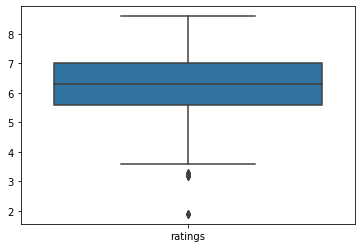

In [63]:
# Quick plot to check for outliers in the data set
plt.box
data=genres_df
sns.boxplot(data=data);

In [64]:
# Check for median in dataset
print(f"Median of ratings: {genres_df['ratings'].median()}")

# Checking the mean of the dataset
print(f"Mean of ratings: {genres_df['ratings'].mean()}")

 # Checking the mode of the dataset
print(f"Mode of ratings: {genres_df['ratings'].mode()}")

Median of ratings: 6.3
Mean of ratings: 6.188087248322148
Mode of ratings: 0    6.2
dtype: float64


Median shall be taken as the measure of central tendancy due to the outliers present

In [65]:
# Data grouped by the genres and an average for each genre is generated
genres_df=genres_df.groupby(['genre']).median()

In [66]:
# Genres dataset is sorted in descending order to give us the highest rated genres in order
genres_df.sort_values(by="ratings", ascending= False, inplace= True)

In [67]:
genres_df

,ratings
genre,
Documentary,7.70
Sport,7.05
History,7.00
Biography,6.75
Animation,6.70
Musical,6.65
Adventure,6.55
Drama,6.50
Music,6.40


## 3.2 WHICH DIRECTORS AND WRITERS SHOULD YOU SEEK OUT?
Here we will look into the second factor that we will be considering i.e. who to lead the projects.
We will be comparing the list of directors sourced from rottentomato and compare this against profits per movie that each director has directed. Conversely we can also get the top screen writers as well. This will follow the steps below

* Merging between data from TheNumbers dataframe and fromrottentomato dataframe
* Check for duplicates and drop duplicates
* Group based on director or writer respectively
* Sort the values in corresponding order

In [68]:
#Merging the two dataframes from TheNumbers and rotten_tomato
merged_df=pd.merge(production_df,budget_and_revenue_df, left_on="theater_date", right_on="release_date")

In [69]:
#Calling function to check for duplicates
get_duplicates(merged_df)

,rating,genre,director,writer,theater_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profits
2809,R,Action,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2810,R,Action,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2811,R,Adventure,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2812,R,Adventure,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2813,R,Drama,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2814,R,Drama,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2815,R,Mystery,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2816,R,Mystery,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2817,R,Suspense,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901
2818,R,Suspense,Richard Lester,Charles Wood,1979-12-21,50,1979-12-21,The Black Hole,20000000,35841901,35841901,15841901


Observation:
- It is paramount to check for duplicates after merging dataframes that do not have unique keys in both dataframes. This causes duplicates to occur and would skew the data by having multiples of the same data


In [70]:
#Calling function to drop duplicate data
drop_data(merged_df)

,rating,genre,director,writer,theater_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profits
0,R,Action,William Friedkin,Ernest Tidyman,1971-10-09,71,1971-10-09,The French Connection,2200000,41158757,41158757,38958757
1,R,Adventure,William Friedkin,Ernest Tidyman,1971-10-09,71,1971-10-09,The French Connection,2200000,41158757,41158757,38958757
2,R,Classics,William Friedkin,Ernest Tidyman,1971-10-09,71,1971-10-09,The French Connection,2200000,41158757,41158757,38958757
3,R,Drama,William Friedkin,Ernest Tidyman,1971-10-09,71,1971-10-09,The French Connection,2200000,41158757,41158757,38958757
4,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,81,2012-08-17,The Expendables 2,100000000,85028192,311979256,211979256
...,...,...,...,...,...,...,...,...,...,...,...,...
8994,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,54,2012-10-05,Taken 2,45000000,139854287,377807404,332807404
8995,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,48,2012-10-05,Frankenweenie,39000000,35287788,81150788,42150788
8996,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,37,2012-10-05,The Paperboy,12500000,677200,4027663,-8472337
8997,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,30,2012-10-05,Wuthering Heights,8000000,100915,2721534,-5278466


In [71]:
#  Calling function to confirm no presence of duplicate data
get_duplicates(merged_df)

,rating,genre,director,writer,theater_date,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,gross_profits


<AxesSubplot:>

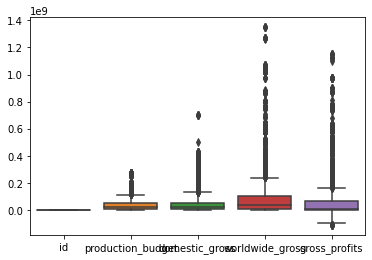

In [72]:
# Quick boxplot to check for outliers
data =merged_df
sns.boxplot(data=data)

In [73]:
# Checking for mean
print(f"Mean: {merged_df['gross_profits'].mean()}")

# checking for median
print(f"Median: {merged_df['gross_profits'].median()}")

Mean: 53191789.93116869
Median: 10657941.0


There are significantly many outliers in the dataset, mean shall be used as a measure of central tendancy all values must be considered.

In [74]:
#we shall create two dataframes for director and writer and find them in order of profits

#grouped by director, an aggregation function to find average and sorted in descending order 
grouped_director=merged_df.groupby("director").mean().sort_values( by ="gross_profits" ,ascending=False).reset_index()

#grouped by writer, an aggregation function to find average, and sorted in descending order
grouped_writer=merged_df.groupby("writer").mean().sort_values( by ="gross_profits" ,ascending=False).reset_index()

In [75]:
grouped_director

,director,id,production_budget,domestic_gross,worldwide_gross,gross_profits
0,Steven Spielberg,45.634146,8.553659e+07,2.626861e+08,7.169972e+08,6.314606e+08
1,Mel Gibson,60.000000,2.500000e+07,3.707829e+08,6.223419e+08,5.973419e+08
2,Richard Marquand,84.000000,3.250000e+07,3.092051e+08,5.727051e+08,5.402051e+08
3,Peter Jackson,28.666667,1.683333e+08,2.030177e+08,6.798151e+08,5.114818e+08
4,Eric England,45.000000,7.850000e+07,2.234440e+08,5.767096e+08,4.982096e+08
...,...,...,...,...,...,...
503,Wayne Wang,94.000000,5.000000e+07,1.008594e+07,1.008594e+07,-3.991406e+07
504,Motonori Sakakibara,24.000000,1.370000e+08,3.213183e+07,8.513183e+07,-5.186817e+07
505,Jack Fletcher,24.000000,1.370000e+08,3.213183e+07,8.513183e+07,-5.186817e+07
506,Hironobu Sakaguchi,24.000000,1.370000e+08,3.213183e+07,8.513183e+07,-5.186817e+07


In [76]:
grouped_writer

,writer,id,production_budget,domestic_gross,worldwide_gross,gross_profits
0,Philippa Boyens,19.000000,2.500000e+08,3.030036e+08,1.017004e+09,7.670036e+08
1,Malia Scotch Marmo,43.333333,6.366667e+07,3.036038e+08,7.796751e+08,7.160084e+08
2,Michael Crichton,17.666667,6.033333e+07,2.914772e+08,7.632751e+08,7.029417e+08
3,Benedict Fitzgerald,60.000000,2.500000e+07,3.707829e+08,6.223419e+08,5.973419e+08
4,Mel Gibson,60.000000,2.500000e+07,3.707829e+08,6.223419e+08,5.973419e+08
...,...,...,...,...,...,...
778,"Stanford Clarke ""Stan"" Seidel",51.000000,4.750000e+07,1.152604e+07,1.793912e+07,-2.956088e+07
779,Paul Auster,94.000000,5.000000e+07,1.008594e+07,1.008594e+07,-3.991406e+07
780,Wayne Wang,94.000000,5.000000e+07,1.008594e+07,1.008594e+07,-3.991406e+07
781,Hironobu Sakaguchi,24.000000,1.370000e+08,3.213183e+07,8.513183e+07,-5.186817e+07


In [77]:
grouped_director["director"][:10]

0        Steven Spielberg
1              Mel Gibson
2        Richard Marquand
3           Peter Jackson
4            Eric England
5          Stephen Frears
6         John Stephenson
7               Andy Wolk
8    Vikramaditya Motwane
9               Nick Park
Name: director, dtype: object

### 3.3 DO HIGHER GENRE RATINGS MEAN HIGHER PROFITS?

Here we will look to explore the relationship between genre ratings and the average profits generated from each genre and answer the question, do higher ratings of a genre translate to higher profit margins? We will look to approach the question by following the stpes below:
* We will merge 3 tables i.e. the productin_df, popularuty_df and budget_and_revenue_df
* We will locate any duplicates in the merged dataset and drop any duplicate
* We will the group them by genre and sort by the vote_average
* Then we shall compare the scatter plot to the correlation matrix we shall generate



In [78]:
#performing merging between production_df and popularity_df to match genres and the vote_average which is the popularity ratings
merged=pd.merge(production_df,popularity_df, left_on="theater_date", right_on="release_date")

In [79]:
#Overview of the merged dataframes
merged

,rating,genre,director,writer,theater_date,original_language,popularity,release_date,title,vote_average,vote_count
0,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,17.216,2012-08-17,The Expendables 2,6.2,4219
1,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,13.320,2012-08-17,ParaNorman,6.8,1358
2,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,7.702,2012-08-17,Cosmopolis,5.4,546
3,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,5.156,2012-08-17,Saints and Soldiers: Airborne Creed,5.6,37
4,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,5.056,2012-08-17,Why Stop Now?,5.5,54
...,...,...,...,...,...,...,...,...,...,...,...
14272,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.906,2012-10-05,The Unleashed,0.0,2
14273,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.626,2012-10-05,Cage Fight,5.0,1
14274,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.600,2012-10-05,Romeo Romeo,8.0,1
14275,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.600,2012-10-05,Escape Fire: The Fight to Rescue American Heal...,8.0,3


In [80]:
#Renaming the vote_average column to popularity_rating for ease of reading
merged.rename(columns={"vote_average": "popularity_rating"}, inplace=True)

In [81]:
#Calling function to check for duplicates in the merged dataframe
get_duplicates(merged)

,rating,genre,director,writer,theater_date,original_language,popularity,release_date,title,popularity_rating,vote_count
403,R,Horror,Matt Bettinelli-Olpin,Lindsay Devlin,2014-01-17,en,2.257,2014-01-17,Maidentrip,7.4,33
415,R,Horror,Matt Bettinelli-Olpin,Lindsay Devlin,2014-01-17,en,2.257,2014-01-17,Maidentrip,7.4,33
438,R,Horror,Tyler Gillett,Lindsay Devlin,2014-01-17,en,2.257,2014-01-17,Maidentrip,7.4,33
450,R,Horror,Tyler Gillett,Lindsay Devlin,2014-01-17,en,2.257,2014-01-17,Maidentrip,7.4,33
613,R,Drama,Ben Younger,Ben Younger,2016-11-18,en,28.563,2016-11-18,Fantastic Beasts and Where to Find Them,7.4,12152
...,...,...,...,...,...,...,...,...,...,...,...
14219,NR,Art House,Ciro Guerra,Jacques Toulemonde Vidal,2016-02-17,es,6.887,2016-02-17,Embrace of the Serpent,7.8,212
14223,NR,International,Ciro Guerra,Ciro Guerra,2016-02-17,es,6.887,2016-02-17,Embrace of the Serpent,7.8,212
14224,NR,International,Ciro Guerra,Ciro Guerra,2016-02-17,es,6.887,2016-02-17,Embrace of the Serpent,7.8,212
14228,NR,International,Ciro Guerra,Jacques Toulemonde Vidal,2016-02-17,es,6.887,2016-02-17,Embrace of the Serpent,7.8,212


In [82]:
#Calling function to drop the duplicates
drop_data(merged)

,rating,genre,director,writer,theater_date,original_language,popularity,release_date,title,popularity_rating,vote_count
0,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,17.216,2012-08-17,The Expendables 2,6.2,4219
1,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,13.320,2012-08-17,ParaNorman,6.8,1358
2,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,7.702,2012-08-17,Cosmopolis,5.4,546
3,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,5.156,2012-08-17,Saints and Soldiers: Airborne Creed,5.6,37
4,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,5.056,2012-08-17,Why Stop Now?,5.5,54
...,...,...,...,...,...,...,...,...,...,...,...
14272,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.906,2012-10-05,The Unleashed,0.0,2
14273,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.626,2012-10-05,Cage Fight,5.0,1
14274,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.600,2012-10-05,Romeo Romeo,8.0,1
14275,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.600,2012-10-05,Escape Fire: The Fight to Rescue American Heal...,8.0,3


In [83]:
#calling function to confirm no duplicates remain
get_duplicates(merged)

,rating,genre,director,writer,theater_date,original_language,popularity,release_date,title,popularity_rating,vote_count


In [84]:
#merging with the third datframe of budget_and_revenue_df which we shall perform the corrlation analysis on
final_merged= pd.merge(merged, budget_and_revenue_df, left_on="theater_date", right_on ="release_date")

In [85]:
#Overwiew of the finalmerged ddataframe with all columns
final_merged

,rating,genre,director,writer,theater_date,original_language,popularity,release_date_x,title,popularity_rating,vote_count,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,gross_profits
0,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,17.216,2012-08-17,The Expendables 2,6.2,4219,81,2012-08-17,The Expendables 2,100000000,85028192,311979256,211979256
1,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,17.216,2012-08-17,The Expendables 2,6.2,4219,89,2012-08-17,ParaNorman,60000000,56003051,108119662,48119662
2,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,17.216,2012-08-17,The Expendables 2,6.2,4219,96,2012-08-17,Sparkle,10000000,24397469,24660323,14660323
3,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,17.216,2012-08-17,The Expendables 2,6.2,4219,4,2012-08-17,The Awakening,4900000,95933,6924321,2024321
4,R,Drama,David Cronenberg,David Cronenberg,2012-08-17,en,17.216,2012-08-17,The Expendables 2,6.2,4219,26,2012-08-17,Robot & Frank,2500000,3317468,4934356,2434356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47407,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.600,2012-10-05,Paralyzed,7.0,3,54,2012-10-05,Taken 2,45000000,139854287,377807404,332807404
47408,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.600,2012-10-05,Paralyzed,7.0,3,48,2012-10-05,Frankenweenie,39000000,35287788,81150788,42150788
47409,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.600,2012-10-05,Paralyzed,7.0,3,37,2012-10-05,The Paperboy,12500000,677200,4027663,-8472337
47410,NR,Drama,Gauri Shinde,Gauri Shinde,2012-10-05,en,0.600,2012-10-05,Paralyzed,7.0,3,30,2012-10-05,Wuthering Heights,8000000,100915,2721534,-5278466


In [86]:
#Calling function to check for duplicates
get_duplicates(final_merged)

,rating,genre,director,writer,theater_date,original_language,popularity,release_date_x,title,popularity_rating,vote_count,id,release_date_y,movie,production_budget,domestic_gross,worldwide_gross,gross_profits


In [87]:
#Performing grouping by the genre column and sorting by the popularity_ratings 
final_merged=final_merged.groupby("genre").mean().sort_values( by ="popularity_rating" ,ascending=False)
final_merged

,popularity,popularity_rating,vote_count,id,production_budget,domestic_gross,worldwide_gross,gross_profits
genre,,,,,,,,
Spirituality,8.122556,6.855556,1479.666667,46.000000,1.975000e+07,1.358834e+07,2.949025e+07,9.740248e+06
Faith,8.122556,6.855556,1479.666667,46.000000,1.975000e+07,1.358834e+07,2.949025e+07,9.740248e+06
Sports,7.474133,6.380000,1532.066667,44.571429,3.771429e+07,4.457065e+07,1.365849e+08,9.887066e+07
Fitness,7.474133,6.380000,1532.066667,44.571429,3.771429e+07,4.457065e+07,1.365849e+08,9.887066e+07
Special Interest,4.718839,6.213625,267.462287,48.726277,1.962864e+07,3.040097e+07,6.089192e+07,4.126329e+07
International,4.540959,6.131292,275.534320,50.474428,2.740055e+07,2.695706e+07,6.720012e+07,3.979957e+07
Art House,4.540959,6.131292,275.534320,50.474428,2.740055e+07,2.695706e+07,6.720012e+07,3.979957e+07
Documentary,4.908060,6.123913,311.586957,51.638587,2.248266e+07,3.812742e+07,7.110978e+07,4.862712e+07
Drama,5.134156,6.077814,490.350128,49.900207,3.352914e+07,4.652120e+07,1.135708e+08,8.004164e+07


In [88]:
#Correlation analysisto determine correlation between popularity_rating and profits
corr_matrix=final_merged.corr()['popularity_rating']

#removing its own value and reassigning it back to the correlation matrix
corr_matrix=corr_matrix[corr_matrix != 1.00]
corr_matrix

popularity           0.735736
vote_count           0.673269
id                  -0.070723
production_budget   -0.348436
domestic_gross      -0.504875
worldwide_gross     -0.376532
gross_profits       -0.348942
Name: popularity_rating, dtype: float64

### 3.4 Who should Microsoft Dream Factory(MDF) partner with?
Here we will look at the performance of other studios based on profits and see who would be the best to partner with on projects based on their history of success. We will consider the top 5 studio houses that Microsoft Dream Factory(MDF) could partner with. This will be done by
1. Merging the relevant dataframes so as to get studio vs profit data
2. We shall sort out the date according to the studio
3. Order the studios according to profits

In [89]:
# Merging of dataframes with profit and studio data
partners= pd.merge(revenue_df, budget_and_revenue_df, left_on= "title", right_on= "movie")
partners.head()

,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,gross_profits
0,Toy Story 3,BV,415000000.0,2010,47,2010-06-18,Toy Story 3,200000000,415004880,1068879522,868879522
1,Inception,WB,292600000.0,2010,38,2010-07-16,Inception,160000000,292576195,835524642,675524642
2,Shrek Forever After,P/DW,238700000.0,2010,27,2010-05-21,Shrek Forever After,165000000,238736787,756244673,591244673
3,The Twilight Saga: Eclipse,Sum.,300500000.0,2010,53,2010-06-30,The Twilight Saga: Eclipse,68000000,300531751,706102828,638102828
4,Iron Man 2,Par.,312400000.0,2010,15,2010-05-07,Iron Man 2,170000000,312433331,621156389,451156389


In [90]:
#Function calling to check for duplicates
get_duplicates(partners)

,title,studio,domestic_gross_x,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,gross_profits


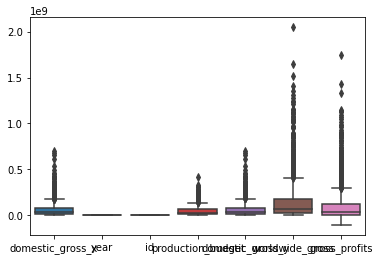

In [91]:

data=partners
sns.boxplot(data=data);

We will consider the mean as a measure of central tendancy as the significant outliers shows that the data points can not be ignored

In [92]:
# Performing grouping of the merged dataset by its studio column and ordering it by profits
ordered= partners.groupby("studio").mean().sort_values(by="gross_profits", ascending= False).reset_index()
ordered

,studio,domestic_gross_x,year,id,production_budget,domestic_gross_y,worldwide_gross,gross_profits
0,P/DW,1.682900e+08,2010.900000,43.900000,1.334000e+08,1.682915e+08,5.078028e+08,3.744028e+08
1,BV,1.795403e+08,2013.902778,40.125000,1.312611e+08,1.795298e+08,4.623058e+08,3.310447e+08
2,GrtIndia,2.020000e+07,2017.000000,55.000000,3.000000e+07,1.898579e+07,2.635029e+08,2.335029e+08
3,Uni.,9.205759e+07,2013.914530,52.965812,5.639060e+07,9.151146e+07,2.335837e+08,1.771931e+08
4,Fox,8.460364e+07,2013.727273,45.918182,7.050455e+07,8.554758e+07,2.435983e+08,1.730938e+08
...,...,...,...,...,...,...,...,...
94,OMNI/FSR,1.200000e+06,2011.000000,90.000000,2.000000e+07,1.186538e+06,6.093725e+06,-1.390628e+07
95,KE,1.210000e+04,2014.000000,51.000000,1.800000e+07,0.000000e+00,9.495300e+04,-1.790505e+07
96,ALP,2.800000e+03,2011.000000,52.000000,2.600000e+07,4.247200e+04,2.923959e+06,-2.307604e+07
97,Free,1.052667e+05,2011.333333,53.666667,3.416667e+07,1.055237e+05,8.597328e+06,-2.556934e+07


## 4. DATA VISUALIZATION 

### 4.1 TREND ANALYSIS ON MOVIE INDUSTRY PERFORMANCE SINCE 2010

In [93]:
production_budget=grouped["production_budget"]
profit=grouped["gross_profits"]
domestic_gross=grouped["domestic_gross_x"]
worldwide_gross=grouped["worldwide_gross"]

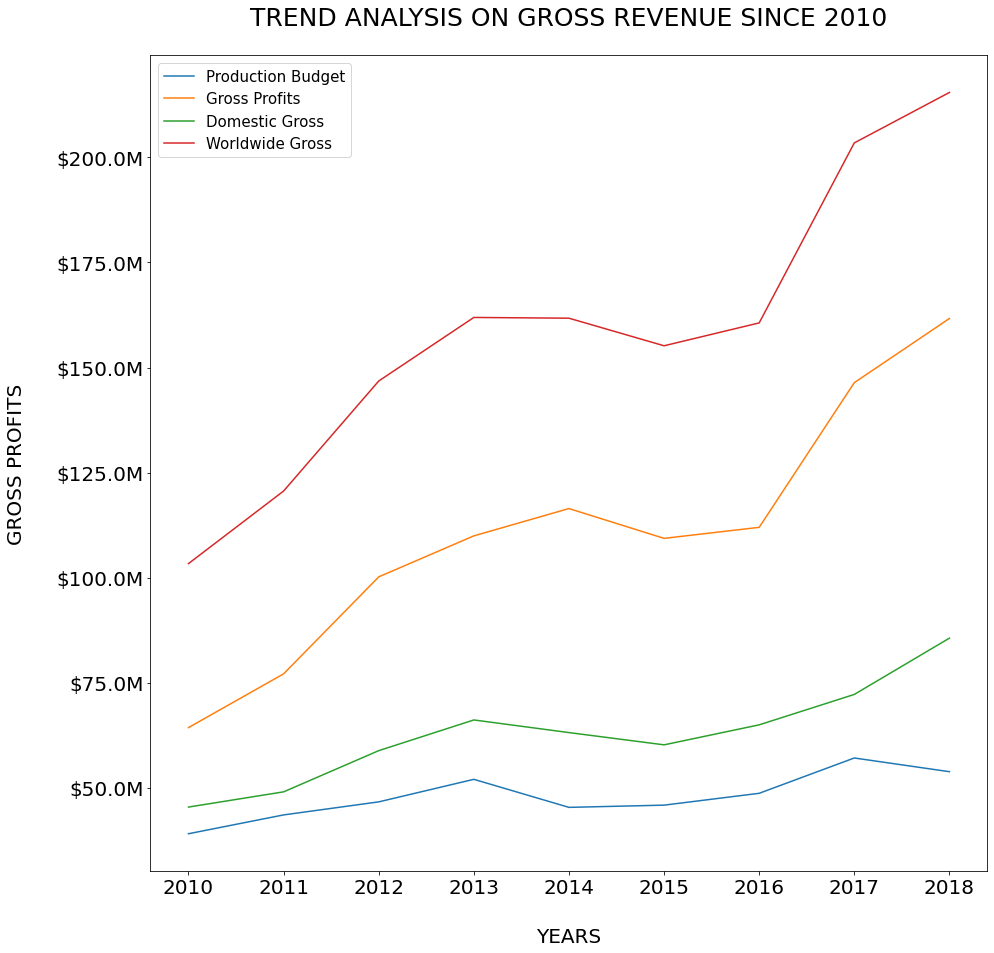

In [94]:
# ASSIGNING THE SIZE OF THE SUBPLOTS 
fig,ax=plt.subplots(figsize=(15,15))

# Function to display y axis in Millions
def millions(x, pos):
    """The two arguments are the value and tick position."""
    return f'${x*1e-6:1.1f}M'

#Plotting the 4 datasets on one plot to see the differnces
ax.plot(production_budget)
ax.plot(profit)
ax.plot(domestic_gross)
ax.plot(worldwide_gross)

# Setting the x_label and y_labels values
ax.set_xlabel("YEARS", fontsize=20, labelpad =30)
ax.set_ylabel("GROSS PROFITS", fontsize=20, labelpad=30)

# Title showing the results if the trend analysis. Years since 2010 vs Gross Revenue
ax.set_title("TREND ANALYSIS ON GROSS REVENUE SINCE 2010", fontsize= 25, pad=30)

# Legend showing the different revenue plots 
ax.legend(["Production Budget","Gross Profits", "Domestic Gross", "Worldwide Gross"], fontsize=15);

# set_major_formatter internally creates a FuncFormatter from the callable.
ax.yaxis.set_major_formatter(millions)

# Setting tick parameters
ax.tick_params(axis='x', which='major', labelsize=20)
ax.tick_params(axis='y', which='major', labelsize=20)


### INSIGHTS:
    It is evident that over the last decade there has been a massive increase on average in regards to the profit margins in the movie industry. While production budget seems to have increased very slightly, there has been a massive increase in worldwide gross revenue. This shows that there is potential within the iindustry for Microsoft Dream Factory to join and for this to steadily continue to grow

### 4.3 5 HIGHEST RATED GENRES

In [95]:
#setting the X and Y axis
y=genres_df['ratings'][:5]
x=genres_df.index[:5]

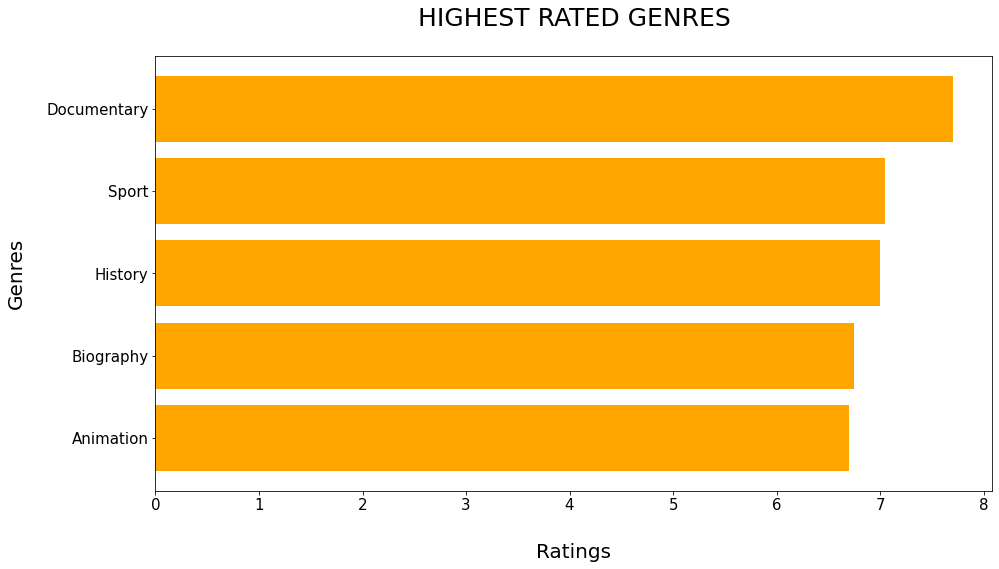

In [96]:
# assigning the subplots figsize
fig,ax=plt.subplots(figsize=(15,8))

#plotting for Genres VS Ratings
ax.barh(x,y, color="orange")
plt.gca().invert_yaxis()

# Setting the X and Y axis labels
ax.set_xlabel("Ratings", fontsize=20, labelpad =30)
ax.set_ylabel("Genres", fontsize=20, labelpad =20)

# Setting the title
ax.set_title("HIGHEST RATED GENRES", fontsize=25,pad=30);

# Setting tick parameters
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

### INSIGHTS:

The 5 highest rated genres are drawn from date since 2010. The genres in order are documentary, sport, history, biography and animation. This shows that the consumer highly rates genres that are most relatable to real life and favor Documentaries over all other genres. This would be the best genres to venture into initially.
A list of the rankings of genres shall be attached at the appendix

### 4.3 TOP 5 MOVIE DIRECTORS AND WRITERS

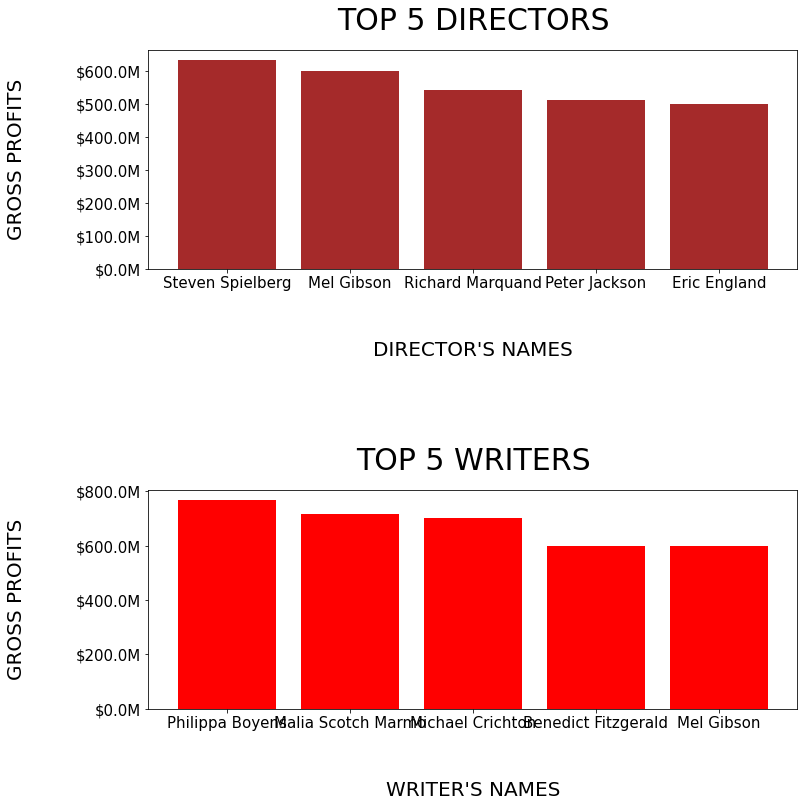

In [97]:
# assigning each variable its corresponding column values vs profits
director=grouped_director["director"][:5]
writer=grouped_writer["writer"][:5]
profits1=grouped_director["gross_profits"][:5]
profits2=grouped_writer["gross_profits"][:5]

# Function to display y axis in Millions
def millions(x, pos):
    """The two arguments are the value and tick position."""
    return f'${x*1e-6:1.1f}M'

#assigning the figsize and setting 2 axis set along each row
fig,(ax1,ax2)=plt.subplots(figsize=(15,15), nrows=2)
fig.tight_layout(pad=20.0)

#plotting the bar graph for each variable
ax1.bar(director,profits1, color="brown")
ax2.bar(writer,profits2, color="red")

# Setting title for each plot
ax1.set_title("TOP 5 DIRECTORS",fontsize=30,pad=20)
ax2.set_title("TOP 5 WRITERS",fontsize=30,pad=20)

# Setting axis 1  X and Y axis labels
ax1.set_xlabel("DIRECTOR'S NAMES", fontsize=20, labelpad =50)
ax1.set_ylabel("GROSS PROFITS", fontsize=20, labelpad =50)

# Setting axis 2  X and Y axis labels
ax2.set_xlabel("WRITER'S NAMES", fontsize=20, labelpad =50)
ax2.set_ylabel("GROSS PROFITS", fontsize=20, labelpad =50);

# set_major_formatter internally creates a FuncFormatter from the callable.
ax1.yaxis.set_major_formatter(millions)
ax2.yaxis.set_major_formatter(millions)

#set tick labels font size for x-axis only
ax1.tick_params(axis='x', which='major', labelsize=15)
ax2.tick_params(axis='x', which='major', labelsize=15)

#set tick labels font size for y-axis only
ax1.tick_params(axis='y', which='major', labelsize=15)
ax2.tick_params(axis='y', which='major', labelsize=15)



### INSIGHTS:
The data shows that the above directors and writers have the highest profit margins from the content they have created. These directors and writers would be the most prefered to consider working with on movie projects as well as a number of other directors and writers provided in the appendix

### 4.4 CORRELATION BETWEEN RATINGS AND PROFITS

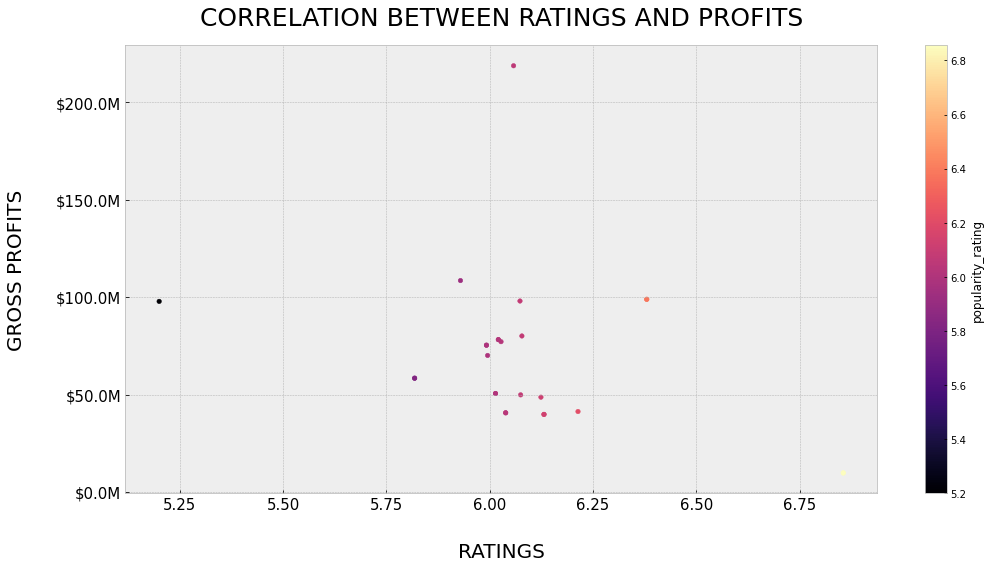

In [98]:
# setting the figure 
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams["figure.autolayout"] = True
plt.style.available
plt.style.use('bmh')

# Function to display y axis in Millions
def millions(x, pos):
    """The two arguments are the value and tick position."""
    return f'${x*1e-6:1.1f}M'

#plotting the scatter graph and enforcing the x label using sharex
ax = final_merged.plot.scatter(x='popularity_rating',
                      y='gross_profits',
                       c="popularity_rating",
                       colormap='magma', sharex=False)

# Setting the X and Y axis labels        
ax.set_xlabel("RATINGS",fontsize=20, labelpad =30)    
ax.set_ylabel("GROSS PROFITS", fontsize=20, labelpad =30)

# setting the title label
ax.set_title("CORRELATION BETWEEN RATINGS AND PROFITS", fontsize=25, pad=20);

# set_major_formatter internally creates a FuncFormatter from the callable.
ax.yaxis.set_major_formatter(millions)

# Setting tick parameters
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

### INSIGHTS:
We can see that rating and profits have a slight negative correlation. The correlation however does not mean causation as there could be underlying factors such as marketing strategies, crew presence as well as the audience that the movie is made for.

### 4.4 5 HIGHEST PROFIT GENERATING STUDIOS

In [99]:
# Assigning the X and Y axis to be plotted i.e. studio and profits columns
Studios=ordered["studio"][:5]
Profits=ordered["gross_profits"][:5]

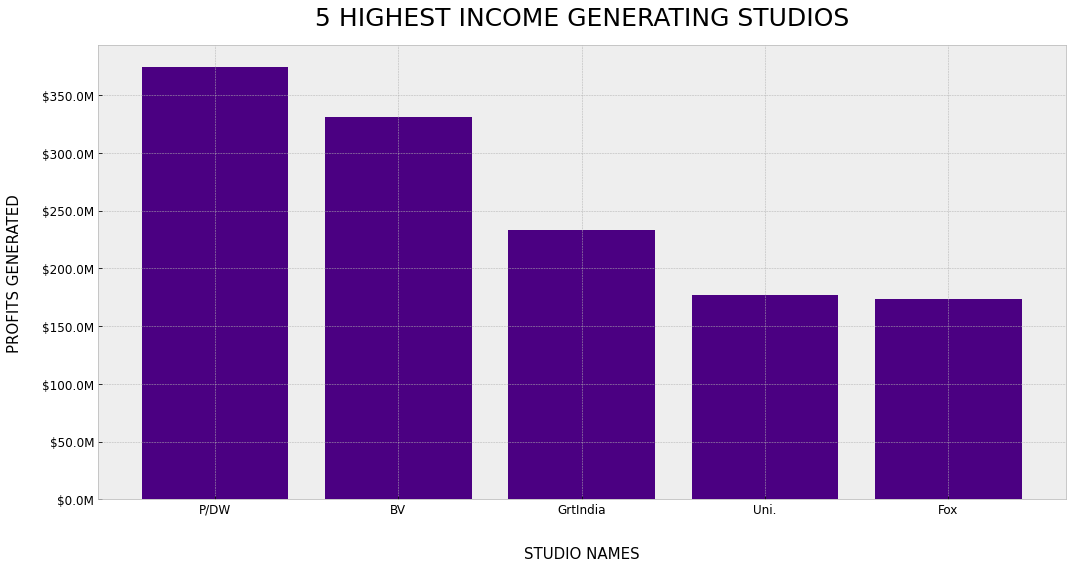

In [100]:
# Function to display y axis in Millions
def millions(x, pos):
    """The two arguments are the value and tick position."""
    return f'${x*1e-6:1.1f}M'

# Assigning the figsize to the figure
fig,ax=plt.subplots(figsize=(15,8))

# Plotting the bar graph
ax.bar(Studios, Profits,color="indigo");

# Setting the X and Y labels
ax.set_xlabel("STUDIO NAMES", fontsize=15, labelpad=30)
ax.set_ylabel("PROFITS GENERATED",fontsize=15, labelpad=20)

# Setting the title of the bar graph
ax.set_title("5 HIGHEST INCOME GENERATING STUDIOS", fontsize=25, pad=20);

# set_major_formatter internally creates a FuncFormatter from the callable.
ax.yaxis.set_major_formatter(millions)

# Setting tick parameters
ax.tick_params(axis='x', which='major', labelsize=12)
ax.tick_params(axis='y', which='major', labelsize=12)

### INSIGHTS:
    From the data we can see that the following 5 studios would make the largest profit margins. These are paramount/DreamWorks, Walt Disney,Grtindia, Universal studio and Fox studios. Consider working with these studios for projects that would require partnership especially on projects centered on the international market. The will also be the biggest competition so benchmarking with them would be an advantage.

### CONCLUSION:
While the information garnered gives us a wide range of information that can be further investigated, it is missing some key factors that would determine the success of a studio such as marketing strategy, cultural impact analysis, Intellectual Property and Franchise Development and many other factors that need to be further identified

### 5. RECOMMENDATIONS
From the thorough analysis the following is recommended:
1. The genres to most consider venturing into initially are documentary, sport, biography, music and history genres which have the highest rating.
2. Consider partnering with the highest rated directors and writers to produce the content that will net you the biggest profit margins
3. The top 5 studios should be considerd as a source of expertise as well as an avenue to explore international markets


### APPENDIX


In [101]:
#List of all genres and their corresponding ratings
print(genres_df)

             ratings
genre               
Documentary     7.70
Sport           7.05
History         7.00
Biography       6.75
Animation       6.70
Musical         6.65
Adventure       6.55
Drama           6.50
Music           6.40
War             6.25
Mystery         6.25
Thriller        6.20
Sci-Fi          6.20
Romance         6.20
Western         6.20
Fantasy         6.20
Family          6.20
Crime           6.20
Action          6.15
Comedy          6.10
Game-Show       5.60
Horror          5.35


In [102]:
#list of top 20 directors
print(grouped_director["director"][:20])

0         Steven Spielberg
1               Mel Gibson
2         Richard Marquand
3            Peter Jackson
4             Eric England
5           Stephen Frears
6          John Stephenson
7                Andy Wolk
8     Vikramaditya Motwane
9                Nick Park
10     Phil Alden Robinson
11        Robert Stromberg
12         Taylor Hackford
13             Tate Taylor
14         Colin Trevorrow
15        Hirokazu Koreeda
16              James Gray
17            Joe Johnston
18               Brad Bird
19           Charles Shyer
Name: director, dtype: object


In [103]:
#list of top 20 writer
print(grouped_writer["writer"][:20])

0          Philippa Boyens
1       Malia Scotch Marmo
2         Michael Crichton
3      Benedict Fitzgerald
4               Mel Gibson
5          James Higginson
6              Mark Burton
7             George Lucas
8             Eric England
9              Candace Lee
10               Jeff Pope
11             Eric Newman
12            Steve Coogan
13             Jim Piddock
14           Josh Friedman
15    Vikramaditya Motwane
16            Bhavani Iyer
17          Anurag Kashyap
18            Ernest Cline
19           Peter Jackson
Name: writer, dtype: object
